## Data Cleaning and Preprocessing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_item_interaction=pd.read_csv("../data/rating.csv")
content_mta=pd.read_csv("../data/movie.csv")

In [3]:
user_item_interaction

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [4]:
content_mta

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [5]:
content_mta["movieId"].nunique()

27278

In [6]:
movie_tags=pd.read_csv("../data/tag.csv")

In [7]:
movie_tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [8]:
movie_tags[movie_tags.tag.isnull()]

,userId,movieId,tag,timestamp
373276,116460,123,NaN,2008-01-04 12:47:47
373277,116460,346,NaN,2008-01-04 13:05:46
373281,116460,1184,NaN,2008-01-04 13:11:01
373288,116460,1785,NaN,2008-01-04 13:06:46
373289,116460,2194,NaN,2008-01-04 12:44:37
373291,116460,2691,NaN,2008-01-04 12:50:02
373299,116460,4103,NaN,2008-01-04 13:05:20
373301,116460,4473,NaN,2008-01-04 12:50:40
373303,116460,4616,NaN,2008-01-04 13:14:01
373319,116460,7624,NaN,2008-01-04 13:11:06


In [9]:
movie_tags.dropna(inplace=True)

### Consolidating Tag data

In [10]:
genome_tags=pd.read_csv("../data/genome_tags.csv")
genome_scores=pd.read_csv("../data/genome_scores.csv")

In [11]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


In [12]:
tag_data=genome_tags.merge(genome_scores,on="tagId",how="left")

In [13]:
tag_data.describe()

,tagId,movieId,relevance
count,1.170977e+07,1.170977e+07,1.170977e+07
mean,5.645000e+02,2.584297e+04,1.164833e-01
std,3.256254e+02,3.467615e+04,1.542463e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,2.827500e+02,2.926000e+03,2.425000e-02
50%,5.645000e+02,6.017000e+03,5.650000e-02
75%,8.462500e+02,4.606200e+04,1.415000e-01
max,1.128000e+03,1.311700e+05,1.000000e+00


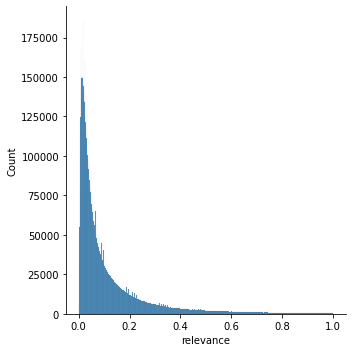

In [14]:
sns.displot(tag_data.relevance)

In [15]:
movie_tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [16]:
tag_data

,tagId,tag,movieId,relevance
0,1,007,1,0.02500
1,1,007,2,0.03975
2,1,007,3,0.04350
3,1,007,4,0.03725
4,1,007,5,0.04200
...,...,...,...,...
11709763,1128,zombies,130578,0.01325
11709764,1128,zombies,130840,0.13375
11709765,1128,zombies,131013,0.01625
11709766,1128,zombies,131168,0.01725


In [17]:
movie_tags.movieId.nunique()==tag_data.movieId.nunique()

False

In [18]:
master_data=user_item_interaction.merge(content_mta,how="left",on="movieId")

In [19]:
master_data

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,Up (2009),Adventure|Animation|Children|Drama
20000259,138493,69526,4.5,2009-12-03 18:31:48,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX
20000260,138493,69644,3.0,2009-12-07 18:10:57,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...
20000261,138493,70286,5.0,2009-11-13 15:42:24,District 9 (2009),Mystery|Sci-Fi|Thriller


In [20]:
userId=master_data.userId.unique()[11]

In [21]:
master_data["number_of_genres"]=master_data["genres"].apply(lambda x: len(x.split("|")))

In [22]:
master_data

,userId,movieId,rating,timestamp,title,genres,number_of_genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,3
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,5
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3
...,...,...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,Up (2009),Adventure|Animation|Children|Drama,4
20000259,138493,69526,4.5,2009-12-03 18:31:48,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX,4
20000260,138493,69644,3.0,2009-12-07 18:10:57,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...,6
20000261,138493,70286,5.0,2009-11-13 15:42:24,District 9 (2009),Mystery|Sci-Fi|Thriller,3


In [23]:
master_data["primary_genre"]=master_data["genres"].apply(lambda x:x.split("|")[0])

In [24]:
master_data["disliked"]=master_data["rating"].apply(lambda x: 1 if x<3 else 0)

In [25]:
userId=master_data["userId"].sample(1).values[0]
single_user=master_data[master_data["userId"]==userId]

In [26]:
single_user

,userId,movieId,rating,timestamp,title,genres,number_of_genres,primary_genre,disliked
13059209,90163,1,4.5,2012-07-30 01:10:39,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,Adventure,0
13059210,90163,10,5.0,2012-07-30 00:58:52,GoldenEye (1995),Action|Adventure|Thriller,3,Action,0
13059211,90163,16,4.5,2012-07-30 01:29:43,Casino (1995),Crime|Drama,2,Crime,0
13059212,90163,19,4.0,2012-07-30 02:05:01,Ace Ventura: When Nature Calls (1995),Comedy,1,Comedy,0
13059213,90163,34,4.5,2012-07-30 02:24:04,Babe (1995),Children|Drama,2,Children,0
...,...,...,...,...,...,...,...,...,...
13059555,90163,89774,2.0,2012-07-30 01:29:09,Warrior (2011),Drama,1,Drama,1
13059556,90163,90866,4.0,2012-07-30 01:42:59,Hugo (2011),Children|Drama|Mystery,3,Children,0
13059557,90163,91529,0.5,2012-07-30 00:55:42,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,4,Action,1
13059558,90163,94959,4.0,2012-07-30 00:56:05,Moonrise Kingdom (2012),Comedy|Drama|Romance,3,Comedy,0


In [31]:
single_user[single_user["disliked"]==1]["primary_genre"].value_counts()

Action         21
Drama           7
Crime           4
Comedy          3
Horror          3
Adventure       3
Children        2
Film-Noir       1
Documentary     1
Animation       1
Name: primary_genre, dtype: int64

In [27]:
# master_data["release_year"]=master_data["title"].apply(lambda x:int(x[-5:-1]))

In [28]:
tag_data.to_csv("../tag_data_with_scores.csv",index=False)

In [29]:
np.nan

nan

In [30]:
descriptors={}

for i in movie_tags.iterrows():
    try:
        descriptors[i[1]["movieId"]]+=" "+i[1]["tag"]
    except KeyError:
        descriptors[i[1]["movieId"]]=i[1]["tag"]
descriptors

KeyboardInterrupt: 